In [1]:
# !pip install transformers
# !pip install nlpaug
# from google.colab import drive
# from google.colab import files
# drive.mount('/content/gdrive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
import transformers
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
from torch import nn
import torch.nn.functional as F
#from tqdm import trange
from tqdm.notebook import tqdm, trange
import os
from transformers import AdamW, get_linear_schedule_with_warmup
import nlpaug


cuda


In [2]:
PATH = 'C:/Users/Hardeep/Desktop/nlp_proj/'
set_user = 0
import sys
import os
print(PATH)
sys.path.append(os.path.abspath(PATH))
rev = pd.read_json(PATH + 'yelp_review_training_dataset.jsonl', lines=True)

delete_aug_data = pd.read_csv(PATH + 'augmentations/delete_aug.csv', header=None)
swap_aug_data = pd.read_csv(PATH + 'augmentations/swap_aug.csv', header=None)
typo_aug_data = pd.read_csv(PATH + 'augmentations/typo_aug.csv', header=None)
synoynm_aug_data = pd.read_csv(PATH + 'augmentations/synonym_aug.csv', header=None)

delete_aug_data.columns = delete_aug_data.iloc[0]
delete_aug_data = delete_aug_data[1:]
delete_aug_data['stars'] = delete_aug_data['stars'].astype('int64')

swap_aug_data.columns = swap_aug_data.iloc[0]
swap_aug_data = swap_aug_data[1:]
swap_aug_data['stars'] = swap_aug_data['stars'].astype('int64')

typo_aug_data.columns = typo_aug_data.iloc[0]
typo_aug_data = typo_aug_data[1:]
typo_aug_data['stars'] = typo_aug_data['stars'].astype('int64')

synoynm_aug_data.columns = synoynm_aug_data.iloc[0]
synoynm_aug_data = synoynm_aug_data[1:]
synoynm_aug_data['stars'] = synoynm_aug_data['stars'].astype('int64')

C:/Users/Hardeep/Desktop/nlp_proj/


C:\Users\Hardeep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
del1 = delete_aug_data[delete_aug_data['stars'] == 1]
swap1 = swap_aug_data[swap_aug_data['stars'] == 1]
typo1 = typo_aug_data[typo_aug_data['stars'] == 1]
syn1 = synoynm_aug_data[synoynm_aug_data['stars'] == 1]

del2 = delete_aug_data[delete_aug_data['stars'] == 2]
swap2 = swap_aug_data[swap_aug_data['stars'] == 2]
typo2 = typo_aug_data[typo_aug_data['stars'] == 2]
syn2 = synoynm_aug_data[synoynm_aug_data['stars'] == 2]

del3 = delete_aug_data[delete_aug_data['stars'] == 3]
swap3 = swap_aug_data[swap_aug_data['stars'] == 3]
typo3 = typo_aug_data[typo_aug_data['stars'] == 3]
syn3 = synoynm_aug_data[synoynm_aug_data['stars'] == 3]

del4 = delete_aug_data[delete_aug_data['stars'] == 4]
swap4 = swap_aug_data[swap_aug_data['stars'] == 4]
typo4 = typo_aug_data[typo_aug_data['stars'] == 4]
syn4 = synoynm_aug_data[synoynm_aug_data['stars'] == 4]

del5 = delete_aug_data[delete_aug_data['stars'] == 5]
swap5 = swap_aug_data[swap_aug_data['stars'] == 5]
typo5 = typo_aug_data[typo_aug_data['stars'] == 5]
syn5 = synoynm_aug_data[synoynm_aug_data['stars'] == 5]

In [4]:
delete_aug_data.shape, swap_aug_data.shape, typo_aug_data.shape, synoynm_aug_data.shape, rev.shape

((533581, 2), (533581, 2), (533581, 2), (533581, 2), (533581, 3))

In [5]:
rev = rev.drop(columns={'review_id'})

In [6]:
del1.shape, swap5.shape, typo5.shape, syn5.shape

((129878, 2), (261160, 2), (261160, 2), (261160, 2))

In [7]:
random_25k_4 = np.random.randint(0,del4.shape[0], size=25000)
random_10k_5 = np.random.randint(0, del5.shape[0], size=10000)
random_10k_1 =  np.random.randint(0, del1.shape[0], size=20000)

In [8]:
rev_aug = pd.concat([rev, del1.iloc[random_10k_1], swap1.iloc[random_10k_1], typo1.iloc[random_10k_1], syn1.iloc[random_10k_1], del2, swap2, typo2, syn2, del3,swap3,typo3,syn3,del4.iloc[random_25k_4],swap4.iloc[random_25k_4],typo4.iloc[random_25k_4],syn4.iloc[random_25k_4], del5.iloc[random_10k_5], swap5.iloc[random_10k_5],typo5.iloc[random_10k_5], syn5.iloc[random_10k_5]  ], ignore_index=True)

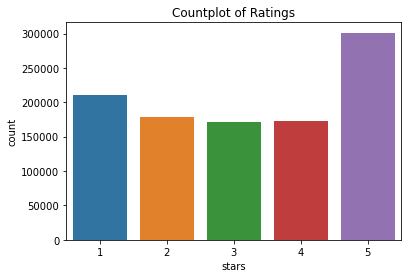

In [9]:
aug_ratings = rev_aug['stars']
plt.title('Countplot of Ratings')
sns.countplot(x=aug_ratings);

In [10]:
rev_aug

,text,stars
0,Total bill for this horrible service? Over $8G...,1
1,I *adore* Travis at the Hard Rock's new Kelly ...,5
2,I have to say that this office really has it t...,5
3,Went in for a lunch. Steak sandwich was delici...,5
4,Today was my second out of three sessions I ha...,1
...,...,...
1034060,"This place be great, was warned about fish Sme...",5
1034061,Excellent car wash. The airstream itself does ...,5
1034062,I block off by during my lunch break to get an...,5
1034063,"Not to bad mouth other troupe, but I hate when...",5


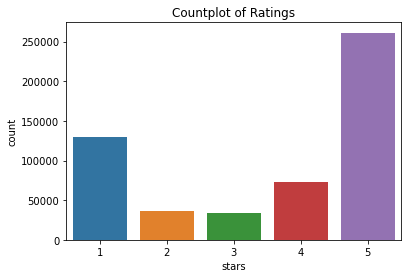

In [11]:
all_ratings = rev['stars']
plt.title('Countplot of Ratings')
sns.countplot(x=all_ratings);

In [12]:
def clean_text(text_data):
    text_data = text_data.lower()
    #text_data = re.sub('\w*\d\w*', "", text_data)
    return text_data   
rev_aug['clean_text'] = rev_aug.text.apply(lambda x: clean_text(x))


In [13]:
inds = np.random.randint(0, rev_aug.shape[0], size = 533581)
X = rev_aug['clean_text'].iloc[inds]
y = rev_aug['stars'].iloc[inds]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.4, random_state=123)

In [15]:
X_train

748058    i chose to visit based upon a groupon deal. i ...
490878    the good:\n- inexpensive\n- "full" kitchen, ev...
509443    i bought an ice cream cake from this dq locati...
916551    i came here especially for the lobster roll se...
692437    i havr to say tha$ the interior is adesom$ but...
                                ...                        
226335    so, this is a pretty sad day for me because i'...
748192    i had 2 of my children going here and have mix...
866488    see. . unity really wanted to love this place....
621536    i tried the large chicken biryani and found it...
745866    i don ' t think i ' ve ever been so disappoint...
Name: clean_text, Length: 480222, dtype: object

### Our data is not evenly split, with more polarizing reviews being the most popular. Postively rated restaurants are rated the highest

### Real BERT

In [16]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

In [17]:
class ProcessData(torch.utils.data.Dataset):
    def __init__(self, data, tokenizer, max_len, labels):
        self.data = data
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.labels = labels
    
    def __getitem__(self, index):
        review = self.data[index]
        label = self.labels[index]
        return self.tokenizer.encode_plus(review, max_length=self.max_len, padding='max_length', return_attention_mask=True, return_tensors='pt', truncation=True), review, torch.tensor([label-1]).to(torch.long)
    
    def __len__(self):
        review_length = len(self.data)
        return review_length

In [18]:
tokenized_training_data = ProcessData(X_train.to_numpy().tolist(), tokenizer, 150, y_train.to_numpy())
tokenized_validation_data = ProcessData(X_val.to_numpy().tolist(), tokenizer, 150, y_val.to_numpy())
tokenized_test_data = ProcessData(X_test.to_numpy().tolist(), tokenizer, 150, y_test.to_numpy())

In [19]:
#tokenized_training_data[0][0], tokenized_training_data[0][1], tokenized_training_data[0][2]

In [20]:
#Create dataloader
params = {'batch_size': 16,
          'num_workers': 0}
loader_tokenized_training_data = torch.utils.data.DataLoader(tokenized_training_data, **params)
loader_tokenized_validation_data = torch.utils.data.DataLoader(tokenized_validation_data, **params)
loader_tokenized_test_data = torch.utils.data.DataLoader(tokenized_test_data, **params)

### Training BERT model

In [21]:
class BERTNet(nn.Module):
    def __init__(self, classes):
        super(BERTNet, self).__init__()
        self.bert_model = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.drop = nn.Dropout(p=0.3)
        self.linear = nn.Linear(768, classes)
        self.sm = nn.Softmax(dim=1)
    
    def forward(self, input_ids, attention_mask):
        #print(input_ids,attention_mask )
        output = self.bert_model(input_ids, attention_mask)
        output = output[1]
        output = self.drop(output)
        output = self.linear(output)
        return output

In [22]:
model = BERTNet(5).to(device)
#model = model.to(device)
#ex = ex.to(device)
#ex['input_ids'] = ex['input_ids'].to(device)
#ex['attention_mask'] = ex['attention_mask'].to(device)
#ex['token_type_ids'] = ex['token_type_ids'].to(device)

In [23]:
#model(ex['input_ids'], ex['attention_mask'])

In [24]:
#ex

In [25]:
#F.softmax(model(ex['input_ids'], ex['attention_mask']), dim=1)

In [26]:
from torch.optim import Adam
criterion = nn.CrossEntropyLoss().to(device)
optimizer = AdamW(model.parameters(), lr=1e-5, correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0,num_training_steps=len(loader_tokenized_training_data) * 5)

In [27]:
def training(model, data_loader, size):
    model = model.train()
    losses = []
    training_acc = 0
    for data in tqdm(data_loader):
        batch_ids = data[0]['input_ids']
        batch_ids = batch_ids.flatten().reshape((batch_ids.shape[0], batch_ids.shape[2]))
        batch_masks = data[0]['attention_mask']
        batch_masks = batch_masks.flatten().reshape((batch_masks.shape[0], batch_masks.shape[2]))
        data[2] = data[2].to(device)
       
       
        output = model(batch_ids.to(device), batch_masks.to(device))
        #print(output)
     
        prediction = torch.max(output, 1)[1]
 
        training_loss = criterion(output, torch.flatten(data[2]))
        training_acc += torch.sum(prediction == torch.flatten(data[2]))
   
        losses.append(training_loss.item())
        training_loss.backward()
        #nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        
    return training_acc / size, np.mean(losses)

In [28]:
def evaluate(model, data_loader, size):
    model = model.eval()
    losses = []
    validation_acc = 0
    with torch.no_grad():
        for vdata in tqdm(data_loader):
            vbatch_ids = vdata[0]['input_ids']
            vbatch_ids = vbatch_ids.flatten().reshape((vbatch_ids.shape[0], vbatch_ids.shape[2]))
            vbatch_masks = vdata[0]['attention_mask']
            vbatch_masks = vbatch_masks.flatten().reshape((vbatch_masks.shape[0], vbatch_masks.shape[2]))
            vdata[2] = vdata[2].to(device)
           

            voutput = model(vbatch_ids.to(device), vbatch_masks.to(device))
            vprediction = torch.max(voutput, 1)[1]
            
            vloss = criterion(voutput, torch.flatten(vdata[2]))
            validation_acc += torch.sum(vprediction == torch.flatten(vdata[2]))
            losses.append(vloss.item())
    return validation_acc / size, np.mean(losses)

In [29]:
#len(loader_tokenized_training_data)
#a = next(iter(loader_tokenized_training_data))

In [30]:
#PATH = 'C:/Users/Hardeep/Desktop/nlp_proj'

highest_acc = 0
for epoch in trange(5):
    print('Epoch: ' , str(epoch))
    print('==================================')
    training_accuracy, training_loss = training(model,loader_tokenized_training_data,len(X_train) )
    validation_accuracy, validation_loss = evaluate(model, loader_tokenized_validation_data, len(X_val))
    
    print('Training accuracy: ', training_accuracy )
    print('Training loss: ', training_loss)
    print('Validation accuracy: ', validation_accuracy)
    print('Validation loss: ', validation_loss)
    
    torch.save(model.state_dict(), os.path.join(PATH,'epoch'+str(epoch)+'_augmented_full_data_model.pth'))
    #torch.save(model.state_dict(),‘mode.pth’, 'C:/Users/Hardeep/Desktop/nlp_proj')
    
    
    
            
        
        
        

Epoch:  0



Training accuracy:  tensor(0.7183, device='cuda:0')
Training loss:  0.6721179121073196
Validation accuracy:  tensor(0.7699, device='cuda:0')
Validation loss:  0.559855355256084
Epoch:  1



Training accuracy:  tensor(0.8080, device='cuda:0')
Training loss:  0.4797306777752388
Validation accuracy:  tensor(0.8135, device='cuda:0')
Validation loss:  0.4864012972991178
Epoch:  2



Training accuracy:  tensor(0.8716, device='cuda:0')
Training loss:  0.3372877213442758
Validation accuracy:  tensor(0.8392, device='cuda:0')
Validation loss:  0.4470135207031516
Epoch:  3



Training accuracy:  tensor(0.9103, device='cuda:0')
Training loss:  0.24519680379049313
Validation accuracy:  tensor(0.8520, device='cuda:0')
Validation loss:  0.44532326145515566
Epoch:  4



Training accuracy:  tensor(0.9317, device='cuda:0')
Training loss:  0.19049847943904036
Validation accuracy:  tensor(0.8618, device='cuda:0')
Validation loss:  0.44021731684927357



In [36]:
test_acc, test_loss = evaluate(model, loader_tokenized_test_data, len(X_test))

In [37]:
test_acc, test_loss

(tensor(0.8597, device='cuda:0'), 0.4482044073734907)

In [32]:
test_acc, len(np.where(y_test == 5)[0])/len(y_test)

(tensor(0.8597, device='cuda:0'), 0.2926349325337331)

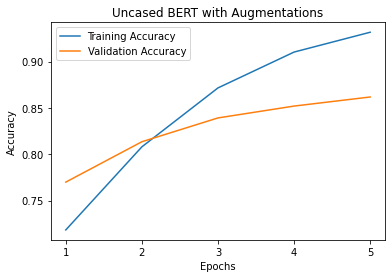

In [35]:
training_accs = [0.7183, 0.8080, 0.8716, 0.9103, 0.9317]
validation_accs = [0.7699, 0.8135, 0.8392, 0.8520, 0.8618]
epochs = [1,2,3,4,5]
plt.plot(epochs,training_accs);
plt.plot(epochs, validation_accs);
plt.xlabel('Epochs');
plt.xticks(epochs);
plt.ylabel('Accuracy');
plt.legend(['Training Accuracy', 'Validation Accuracy']);
plt.title('Uncased BERT with Augmentations');
plt.savefig('06052021_BERT_uncased_augmentated');